In [576]:
import os
import pandas as pd
import seaborn as sns
DATA_PATH = os.path.join("../datasets", "red_wine")

def load_data(fileName, data_path=DATA_PATH):
    csv_path = os.path.join(data_path, fileName)
    return pd.read_csv(csv_path)

In [577]:
data = load_data('winequality-red.csv')
data_copy = data
data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [578]:
data_copy.info() #No data cleaning required since there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [579]:
data_copy['citric acid to volatile acidity'] = data_copy['citric acid'] / data_copy['volatile acidity']
data_copy['citric acid to fixed acidity'] = data_copy['citric acid'] / data_copy['fixed acidity']
data_copy['free to total sulfur dioxide'] = data_copy['free sulfur dioxide'] / data_copy['total sulfur dioxide']
data_copy['volatile acidity to fixed acidity'] =  data_copy['volatile acidity'] / data_copy['fixed acidity']

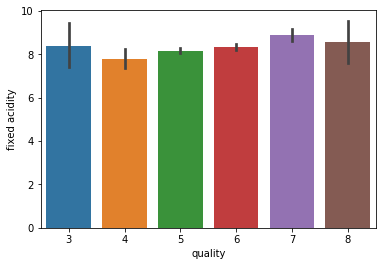

In [580]:
sns.barplot(x='quality', y='fixed acidity', data=data_copy)

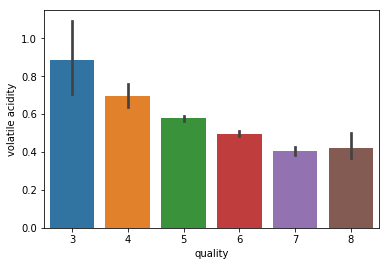

In [581]:
sns.barplot(x='quality', y='volatile acidity', data=data_copy)

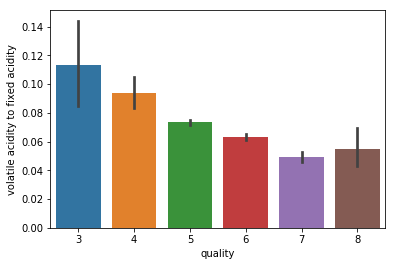

In [582]:
sns.barplot(x='quality', y='volatile acidity to fixed acidity', data=data_copy)

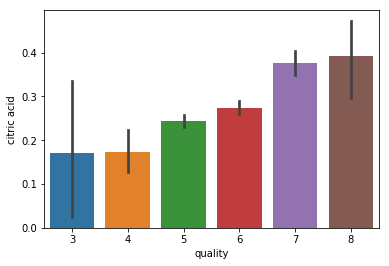

In [583]:
sns.barplot(x='quality', y='citric acid', data=data_copy)

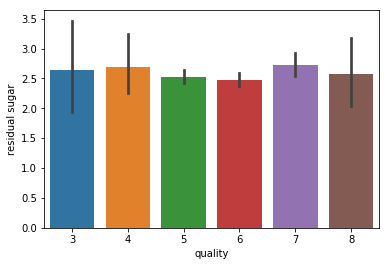

In [584]:
sns.barplot(x='quality', y='residual sugar', data=data_copy)

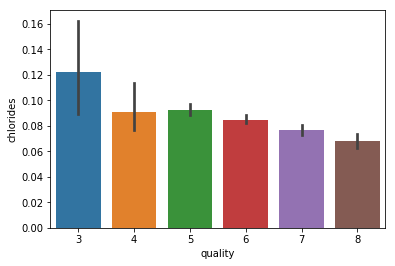

In [585]:
sns.barplot(x='quality', y='chlorides', data=data_copy)

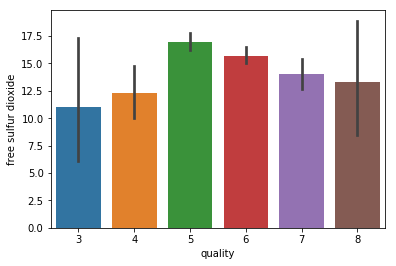

In [586]:
sns.barplot(x='quality', y='free sulfur dioxide', data=data_copy)

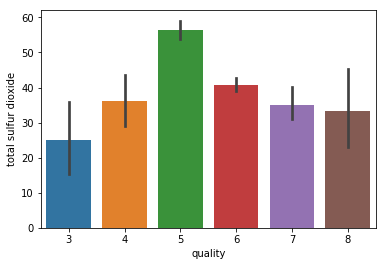

In [587]:
sns.barplot(x='quality', y='total sulfur dioxide', data=data_copy)

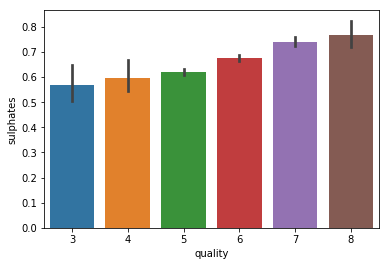

In [588]:
sns.barplot(x='quality', y='sulphates', data=data_copy)

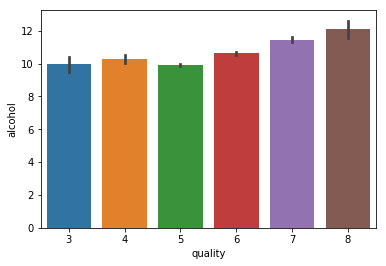

In [589]:
sns.barplot(x='quality', y='alcohol', data=data_copy)

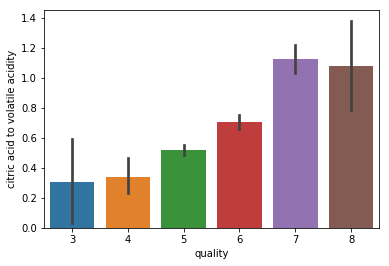

In [590]:
sns.barplot(x='quality', y='citric acid to volatile acidity', data=data_copy)

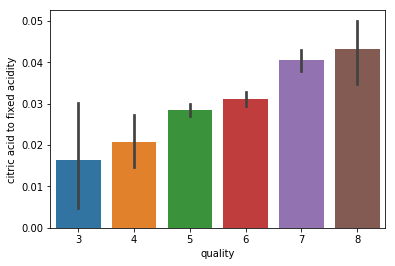

In [591]:
sns.barplot(x='quality', y='citric acid to fixed acidity', data=data_copy)

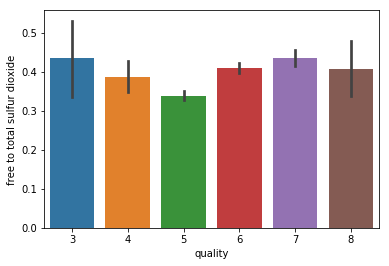

In [592]:
sns.barplot(x='quality', y='free to total sulfur dioxide', data=data_copy)

In [593]:
corr_matrix = data_copy.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                              1.000000
alcohol                              0.476166
citric acid to volatile acidity      0.318031
sulphates                            0.251397
citric acid                          0.226373
citric acid to fixed acidity         0.209167
free to total sulfur dioxide         0.194113
fixed acidity                        0.124052
residual sugar                       0.013732
free sulfur dioxide                 -0.050656
pH                                  -0.057731
chlorides                           -0.128907
density                             -0.174919
total sulfur dioxide                -0.185100
volatile acidity to fixed acidity   -0.343905
volatile acidity                    -0.390558
Name: quality, dtype: float64

In [594]:
data_copy['quality'] = [1 if quality >= 6.5 else 0 for quality in data_copy['quality']]

In [595]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_copy, test_size=0.2, random_state=42)
train_set_labels = train_set['quality']
test_set_labels = test_set['quality']

In [596]:
train_set.drop(['quality', 'free sulfur dioxide', 'residual sugar', 'free to total sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
test_set.drop(['quality', 'free sulfur dioxide', 'residual sugar', 'free to total sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

/home/felix/Documents/Software_Projects/Python/Machine_Learning/env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [597]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [598]:
prepared_train_data = pipeline.fit_transform(train_set)
prepared_test_data = pipeline.fit_transform(test_set)

In [599]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV

import numpy as np

models = [
    {'model': BernoulliNB(), 'model_name': 'BernoulliNB', 'params': {'binarize': [binarize for binarize in np.arange(0, 1, 0.01)],
                                        'fit_prior': [True, False]}},
    {'model': DecisionTreeClassifier(), 'model_name': 'DecisionTreeClassifier', 'params': {'splitter': ['best', 'random'],
                                                   'max_depth': [depth for depth in range(1, 100)],
                                                   'min_samples_split': [min_samples for min_samples in np.arange(0.1, 1, 0.01)],
                                                   'min_samples_leaf': [min_leaf for min_leaf in range(1, 10)]}},
    {'model': RandomForestClassifier(), 'model_name': 'RandomForestClassifier', 'params': {'n_estimators': [n for n in range(1, 100)],
                                                   'max_depth': [depth for depth in range(1, 100)],
                                                   'min_samples_split': [min_samples for min_samples in np.arange(0.1, 1, 0.01)],
                                                   'min_samples_leaf': [min_leaf for min_leaf in range(1, 10)]}},
    {'model': KNeighborsClassifier(), 'model_name': 'KNeighborsClassifier', 'params': {'n_neighbors': [n for n in range(1, 500)],
                                                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                                 'leaf_size': [size for size in range(1, 5000)]}},
    {'model': SVC(), 'model_name': 'SVC', 'params': {'C': [c for c in np.arange(0.01, 3, 0.01)],
                                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                'degree': [degree for degree in range(1, 5)]}},
]

In [600]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def model_selection(X, y, model_info):
    """
    Test various estimators.
    """    
    model = Pipeline([
        ('estimator', model_info['model'])
    ])
    
    model.fit(X, y)  

    expected  = y
    predicted = model.predict(X)

    print('Model:', model_info['model_name'], ',', 'Precision:', (f1_score(expected, predicted)) * 100, '%')
    print(cross_validate(model_info['model'], model_info['model_name'], X, y))

def cross_validate(estimator, estimator_name, X, y):
    scores = cross_val_score(estimator, X, y, scoring='neg_mean_squared_error', cv=10)
    plot_scores(scores, estimator_name)
    
def plot_scores(scores, estimator_name):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [601]:
for model in models:
    model_selection(prepared_test_data, test_set_labels, model)

Model: BernoulliNB , Precision: 50.0 %
Scores: [-0.06060606 -0.15151515 -0.39393939 -0.15625    -0.1875     -0.21875
 -0.21875    -0.12903226 -0.25806452 -0.22580645]
Mean: -0.20002138318670576
Standard Deviation: 0.08440453405777551
None
Model: DecisionTreeClassifier , Precision: 100.0 %
Scores: [-0.12121212 -0.21212121 -0.21212121 -0.15625    -0.09375    -0.125
 -0.15625    -0.09677419 -0.12903226 -0.22580645]
Mean: -0.15283174486803522
Standard Deviation: 0.04620939563160664
None
Model: RandomForestClassifier , Precision: 97.82608695652173 %
Scores: [-0.15151515 -0.18181818 -0.24242424 -0.125      -0.15625    -0.125
 -0.21875    -0.09677419 -0.16129032 -0.19354839]
Mean: -0.16523704789833824
Standard Deviation: 0.042553262571266404
None
Model: KNeighborsClassifier , Precision: 57.14285714285715 %
Scores: [-0.15151515 -0.12121212 -0.21212121 -0.09375    -0.21875    -0.1875
 -0.21875    -0.06451613 -0.22580645 -0.25806452]
Mean: -0.17519855816226784
Standard Deviation: 0.0609064009427

In [642]:
random_grid = {
    'C': [c for c in np.arange(0.001, 3, 0.001)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 1000]
}

In [637]:
rf_random = RandomizedSearchCV(estimator = SVC(), param_distributions = random_grid)

# Fit the random search model
rf_random.fit(prepared_train_data, train_set_labels)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.010000000000000002, 0.011, 0.012, 0.013000000000000001, 0.014000000000000002, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019000000000000003, 0.02, 0.021, 0.022000000000000002, 0.023, 0.024, 0...7, 2.9979999999999998, 2.999], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 10000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [638]:
data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric acid to volatile acidity,citric acid to fixed acidity,free to total sulfur dioxide,volatile acidity to fixed acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.000000,0.000000,0.323529,0.094595
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.000000,0.000000,0.373134,0.112821
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.052632,0.005128,0.277778,0.097436
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,2.000000,0.050000,0.283333,0.025000
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.000000,0.000000,0.323529,0.094595


In [639]:
final_model = rf_random.best_estimator_
final_model.fit(prepared_train_data, train_set_labels)

SVC(C=2.207, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10000, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [640]:
predictions = final_model.predict(prepared_test_data)

In [641]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_set_labels, predictions)
rmse = np.sqrt(mse)
rmse

0.3791437722025775

In [635]:
from sklearn.metrics import classification_report
print(classification_report(test_set_labels, predictions))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.67      0.21      0.32        47

avg / total       0.85      0.87      0.84       320

